📊 Temperatur-statistikk:
Gjennomsnitt: nan
Median: nan
Standardavvik: nan


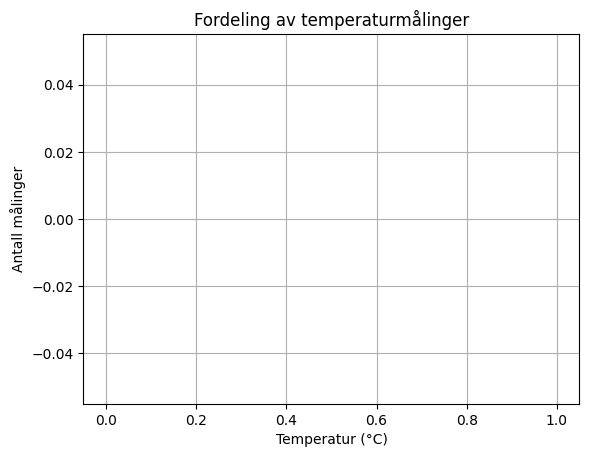

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Les inn JSON-data fra Frost_Observations.json (som ligger i /data)
file_path = os.path.join("..", "data", "Frost_Observations.json")

with open(file_path, "r", encoding="utf-8") as f:
    frost_data = json.load(f)

# Henter ut relevante data
brukbar_data = [
    {
        "elementId": obs["elementId"],
        "sourceId": entry["sourceId"],
        "referenceTime": entry["referenceTime"],
        "value": obs["value"],
        "unit": obs["unit"]
    }
    for entry in frost_data["data"]
    for obs in entry["observations"]
]

# Lager en DataFrame
df = pd.DataFrame(brukbar_data)

# Renser data
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["referenceTime"] = pd.to_datetime(df["referenceTime"], errors="coerce")

# Filtrer for temperaturmålinger
temp_df = df[df["elementId"] == "air_temperature"].copy()

# Statistisk analyse
print("📊 Temperatur-statistikk:")
print("Gjennomsnitt:", temp_df["value"].mean())
print("Median:", temp_df["value"].median())
print("Standardavvik:", temp_df["value"].std())

# Visualisering
temp_df["value"].hist(bins=30)
plt.title("Fordeling av temperaturmålinger")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Antall målinger")
plt.grid(True)
plt.show()
